In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time

In [2]:
df = pd.read_csv("garments_worker_productivity.csv")

In [3]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# EDA 

In [5]:
print("shape of data:" , df.shape)

print("************")

print("Missing values","/n",df.isna().sum())

print("************")

print(df.info())

shape of data: (1197, 15)
************
Missing values /n date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64
************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   target

In [6]:
df.drop(columns = ["date"] , inplace = True)

#  Handling Missing Value

In [7]:
df["wip"].dtypes

dtype('float64')

In [8]:
df["wip"] = df["wip"].fillna(0)

In [9]:
df["wip"] = df["wip"].astype("int64")

In [10]:
df.isna().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

#  Other columns Exploration

In [11]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0,0.800382


In [12]:
df["quarter"].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

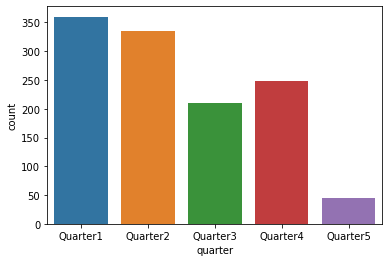

In [13]:
sns.countplot(df["quarter"])
plt.show()

In [14]:
# Change Quarter5 to Quarter4
df["quarter"] = df["quarter"].replace({"Quarter5" : "Quarter4"})

In [15]:
# Department
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [16]:
# striping the space

df["department"] = df["department"].str.strip()

In [17]:
df["department"].unique()

array(['sweing', 'finishing'], dtype=object)

<AxesSubplot:xlabel='department', ylabel='count'>

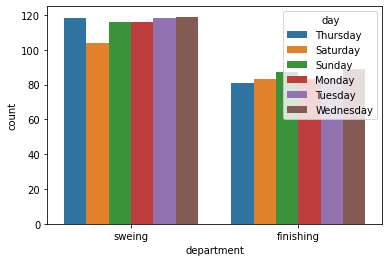

In [18]:
sns.countplot(df["department"] , hue = df["day"])

In [19]:
# Friday seems to be holiday

In [20]:
df["smv"].dtype

dtype('float64')

<AxesSubplot:xlabel='team', ylabel='count'>

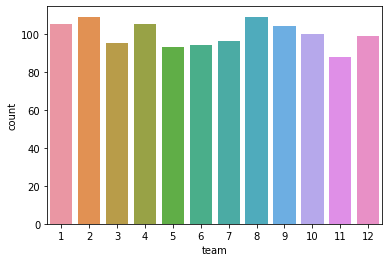

In [21]:
sns.countplot(df["team"])

In [22]:
# Actual Productivity is the Target column which has % value ranging from 0 - 1

In [23]:
#df["actual_productivity"] = round(df["actual_productivity"]*100 ,2)

# Checking Multi Collinearity

<AxesSubplot:>

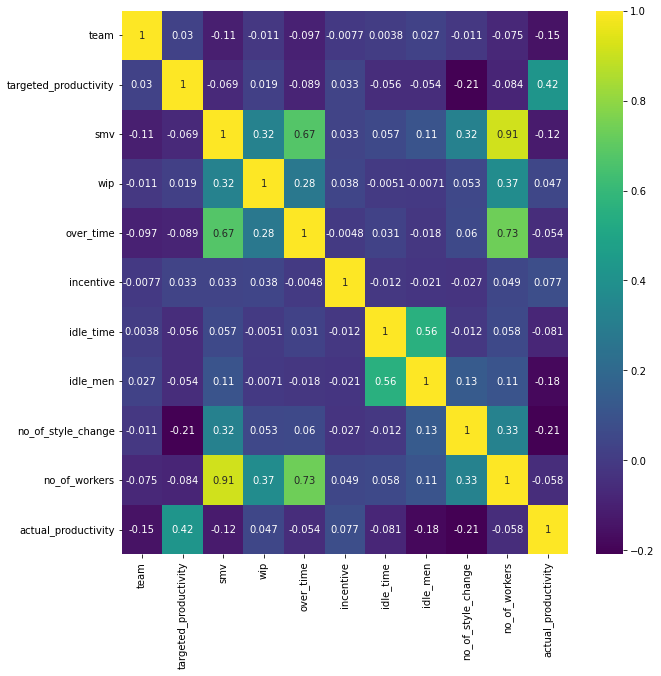

In [24]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr() , annot = True , cmap = "viridis")

In [25]:
# no.of workers and minute allocated are correlated more . But not ignoring any column as of now.

In [26]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [27]:
df_corr = df.corr()

<AxesSubplot:>

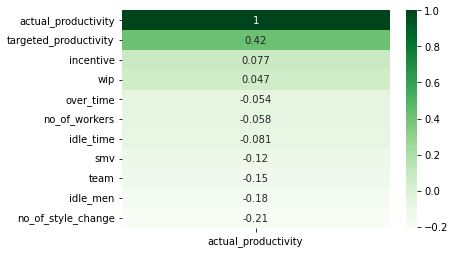

In [28]:
sns.heatmap(df_corr[["actual_productivity"]].sort_values(by = 'actual_productivity' , 
                                                         ascending = False) , annot =True , cmap ="Greens")

In [29]:
df.drop(columns = "day" , inplace =True)

In [30]:
df.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,1,0.75,3.94,0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,11,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,12,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0,0.800382


# Outliers

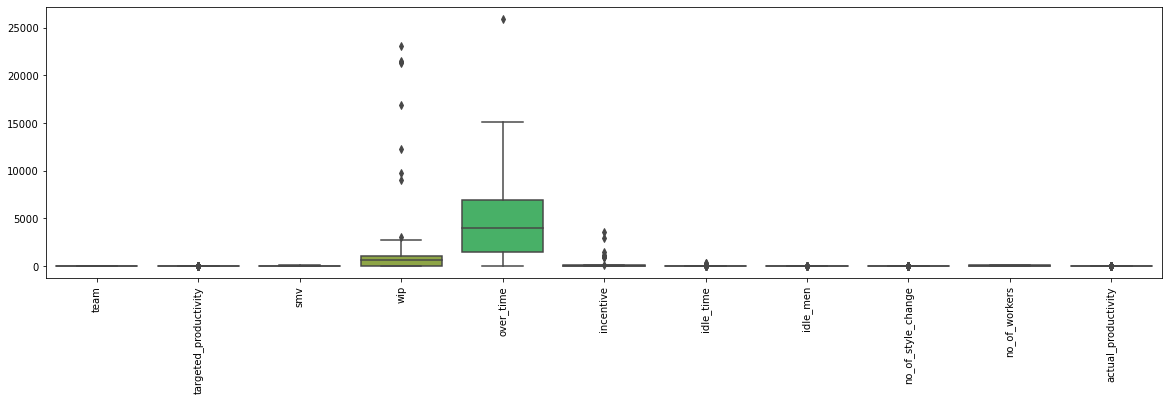

In [31]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df, orient ='v')
plt.xticks(rotation=90)
plt.show()

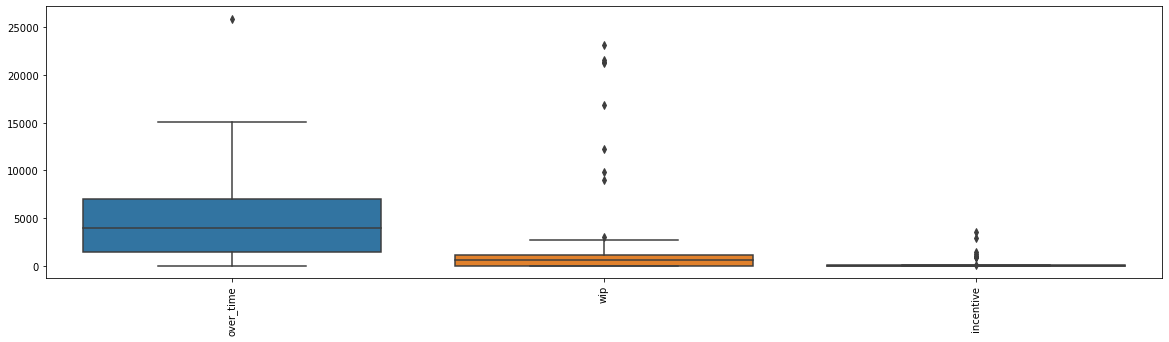

In [32]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df[["over_time","wip","incentive"]], orient ='v')
plt.xticks(rotation=90)
plt.show()

# Handling Outliers

In [33]:
Q1 = df["over_time"].quantile(0.25)
Q3 = df["over_time"].quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
print(lower_limit)
upper_limit = Q3 +1.5*IQR
print(upper_limit)

1440.0
6960.0
5520.0
-6840.0
15240.0


In [34]:
r = df[(df["over_time"] > lower_limit) & (df["over_time"] < upper_limit)]

In [35]:
df.shape[0]

1197

In [36]:
# Function to handle outliers
def outlier_IQR(data , cols):
    
    for col in cols:
        
        print(col)
    
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
    
        lower_limit = Q1 - 1.5*IQR
        print("lower limit for column",col,"is:",lower_limit)
    
        upper_limit = Q3 + 1.5*IQR
        print("upper limit for column",col,"is:",upper_limit)
    
        data = data[(df[col] > lower_limit) & (data[col] < upper_limit)]
        
    
    return(data)
    

In [37]:
outlier_cols = ["over_time" , "wip" ,"incentive"]
df_outlier = outlier_IQR(df , outlier_cols)

over_time
lower limit for column over_time is: -6840.0
upper limit for column over_time is: 15240.0
wip
lower limit for column wip is: -1624.875
upper limit for column wip is: 2708.125
incentive
lower limit for column incentive is: -75.0
upper limit for column incentive is: 125.0


In [38]:
df_outlier.shape

(1176, 13)

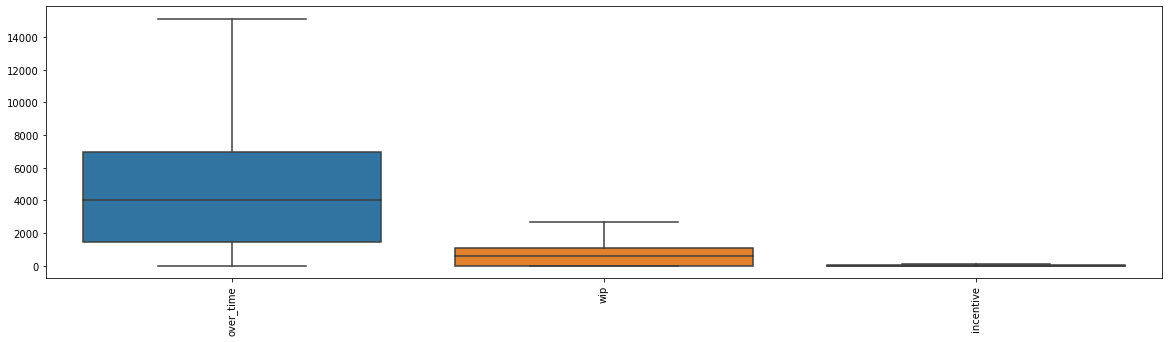

In [39]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df_outlier[["over_time","wip","incentive"]], orient ='v')
plt.xticks(rotation=90)
plt.show()

# Preprocessing 

In [40]:
cat_cols = df_outlier.select_dtypes("object").columns

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
for i in cat_cols:
    df_outlier[i] = le.fit_transform(df_outlier[i])

In [43]:
# Have X and Y dataframes for Model Building
X = df_outlier.drop(columns = ["actual_productivity"])
y = df_outlier["actual_productivity"]

In [44]:
# Standard Scaling Training Dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [45]:
df_ss = pd.DataFrame(ss.fit_transform(df_outlier))
df_ss.columns = df_outlier.columns
df_ss.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,-1.194499,0.854056,0.455616,0.720481,1.008608,0.926217,0.760786,2.413020,-0.057985,-0.114022,-0.355135,1.097504,1.187009
1,-1.194499,-1.170883,-1.571751,0.209020,-1.018120,-1.019391,-1.102067,-0.847073,-0.057985,-0.114022,-0.355135,-1.201499,0.875150
2,-1.194499,0.854056,1.324487,0.720481,-0.336767,0.680382,-0.280220,0.816240,-0.057985,-0.114022,-0.355135,-0.187233,0.380955
3,-1.194499,0.854056,1.614110,0.720481,-0.336767,0.680382,-0.280220,0.816240,-0.057985,-0.114022,-0.355135,-0.187233,0.380955
4,-1.194499,0.854056,-0.123632,0.720481,0.984893,1.035087,-0.809855,0.816240,-0.057985,-0.114022,-0.355135,0.962269,0.379871


In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain , xtest , ytrain , ytest = train_test_split(X , y ,test_size =0.3 , random_state= 30)

In [49]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((823, 12), (353, 12), (823,), (353,))

In [50]:
from sklearn.metrics import mean_squared_error , r2_score ,mean_absolute_error

#  Function to run different algorithms and getting their metrics

In [61]:
def model_metrics(algos):
    
    res = pd.DataFrame()
    df_pred_all = pd.DataFrame()
    
    
    for algo in algos:
        
        #print(algo)
        
        algo.fit(xtrain , ytrain)
        
        y_pred_train = algo.predict(xtrain)
        y_pred = algo.predict(xtest)


        df_pred = pd.DataFrame({"actual" : ytest ,
                                "predicted" : y_pred,
                               "algo" : str(algo).split("(")[0]})
                
        df_pred_train = pd.DataFrame({"actual" : ytrain ,
                                "predicted_train" : y_pred_train})
        
        df_pred_all = df_pred_all.append(df_pred)
        
        mse = mean_squared_error(df_pred["actual"] , df_pred["predicted"])
        mae = mean_absolute_error(df_pred["actual"] , df_pred["predicted"])
        r2score = r2_score(df_pred["actual"] , df_pred["predicted"])
        
    # Adjusted R-square : 1 - [(1-Rsquare)*(n - 1) / (n - k - 1)] n = no.of sample , k =no.of.features
        #adj_r2score = 1 - [((1-r2score)*(len(ytest)-1))/(len(ytest)-xtest.shape[1]-1)]
        
        mse_train = mean_squared_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
        mae_train = mean_absolute_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
        r2score_train = r2_score(df_pred_train["actual"] , df_pred_train["predicted_train"])
       
        
        df_metric = pd.DataFrame({'model' : str(algo).split("(")[0],
                                  "mse" : [mse], 
                                  #"mae" : [mae],
                                  "r2score" : [r2score],
                                  "mse_train" :[mse_train],
                                  #"mae_train" :[mae_train],
                                 "r2score_train" : [r2score_train]
                                 })

        
        res = res.append(df_metric)
     
    print(res)
    #print(tabulate(res , headers='keys', tablefmt='psql'))
    
    print("The Lowest MSE model is :")
    model_good = pd.DataFrame(res.iloc[res["mse"].argmin()]).T.set_index('model')
    print(tabulate(model_good , headers ='keys' , tablefmt = 'psql'))

    return df_pred_all
        

In [62]:
# def model_metrics(algos):
#     res = pd.DataFrame()
    
    
#     for algo in algos:
        
#         #print(algo)
        
#         algo.fit(xtrain , ytrain)
        
#         y_pred_train = algo.predict(xtrain)
#         y_pred = algo.predict(xtest)

        
#         df_pred = pd.DataFrame({"actual" : ytest ,
#                                 "predicted" : y_pred})
        
#         df_pred_train = pd.DataFrame({"actual" : ytrain ,
#                                 "predicted_train" : y_pred_train})
        
#         mse = mean_squared_error(df_pred["actual"] , df_pred["predicted"])
#         mae = mean_absolute_error(df_pred["actual"] , df_pred["predicted"])
        
#         mse_train = mean_squared_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
#         mae_train = mean_absolute_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
#         #print(mse_train , mae_train)
        
#         #r2score = r2_score(df_pred["actual"] , df_pred["predicted"])
       
        
#         df_metric = pd.DataFrame({'model' : str(algo),
#                                   "mse" : [mse], 
#                                   "mae" : [mae],
#                                   "mse_train" :[mse_train],
#                                   "mae_train" :[mae_train]
#                                   #"r2_score" : [r2score]
#                                  })
#         res = res.append(df_metric)
        
#         #plt.figure(figsize=(8, 6))
        
        
        
#         plt.subplot(1, 2, 1)  # Create a subplot for test data regplot
#         sns.regplot(data=df_pred, x="actual", y="predicted", label=str(algo))
#         plt.title("Actual vs Predicted - Test Data")
        
#         plt.subplot(1, 2, 2)  # Create a subplot for train data regplot
#         sns.regplot(data=df_pred_train, x="actual", y="predicted_train", label=str(algo))
#         plt.title("Actual vs Predicted - Train Data")
        
#         plt.tight_layout()  # Adjust the spacing between subplots
        

        
#     plt.legend() 
#     return res.set_index('model')

        

In [63]:
val = model_metrics([lr , rf , gb ,xgb])

                       model       mse   r2score  mse_train  r2score_train
0           LinearRegression  0.021653  0.316585   0.017530       0.407366
0      RandomForestRegressor  0.017625  0.443740   0.003428       0.884104
0  GradientBoostingRegressor  0.016878  0.467298   0.009943       0.663840
0               XGBRegressor  0.018287  0.422821   0.002107       0.928764
The Lowest MSE model is :
+---------------------------+-----------+-----------+-------------+-----------------+
| model                     |       mse |   r2score |   mse_train |   r2score_train |
|---------------------------+-----------+-----------+-------------+-----------------|
| GradientBoostingRegressor | 0.0168781 |  0.467298 |  0.00994328 |         0.66384 |
+---------------------------+-----------+-----------+-------------+-----------------+


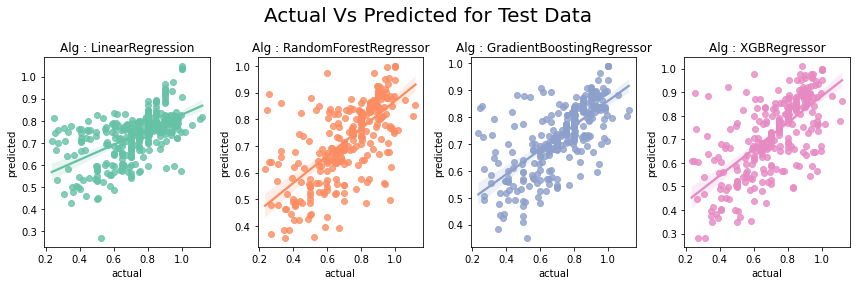

In [64]:
# Create subplots

models = val['algo'].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(12, 4))

palette = sns.color_palette('Set2', n_colors=len(models))

for i, category in enumerate(models):
    ax = axes[i]
    subset = val[val['algo'] == category]
    sns.regplot(subset['actual'], subset['predicted'] , ax=ax, color=palette[i])
    ax.set_title(f'Alg : {category}')


plt.suptitle("Actual Vs Predicted for Test Data" , fontsize = 20)
plt.tight_layout()

In [65]:
# lr Feature Importance
feature_importance_lr = lr.coef_

importance_lr = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_lr})

importance_lr = importance_lr.sort_values(by='Importance', ascending=False)
#print(importance_lr)
# RF Feature Importance
feature_importance_rf = rf.feature_importances_

importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf})

importance_rf = importance_rf.sort_values(by='Importance', ascending=False)
#print(importance_rf)

# GradientBoost Feature Importance
feature_importance_gb = gb.feature_importances_

importance_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_gb})

importance_gb = importance_gb.sort_values(by='Importance', ascending=False)

# Plotting the Feature Importance 

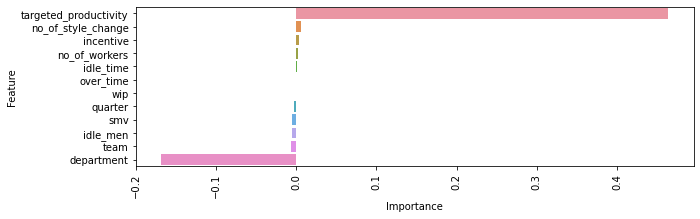

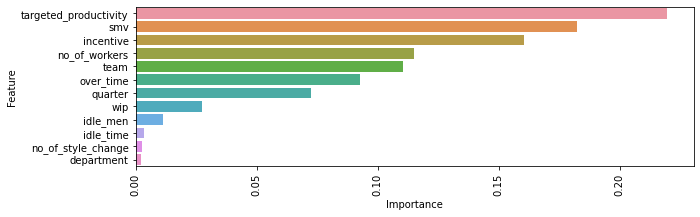

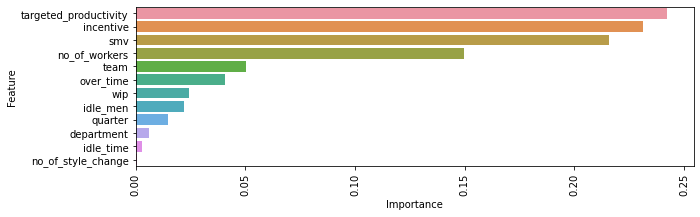

<Figure size 432x288 with 0 Axes>

In [66]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.barplot(data = importance_lr , x = "Importance" ,y ="Feature")
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(3,1,2)
sns.barplot(data = importance_rf , x = "Importance" ,y ="Feature")
plt.xticks(rotation = 90)
plt.show()


plt.figure(figsize = (10,10))
plt.subplot(3,1,3)
sns.barplot(data = importance_gb , x = "Importance" ,y ="Feature")
plt.xticks(rotation = 90)
plt.show()

plt.tight_layout()

In [ ]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(12, 6))
# plot_tree(dt, filled=True)
# plt.show()

In [94]:
# Try prediction for some random rows
gb.predict([xtrain.iloc[0]])

array([0.83095446])

In [95]:
ytrain.iloc[0]

0.850312684

In [74]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
crossvalidation

KFold(n_splits=10, random_state=1, shuffle=True)

In [106]:

search_grid={'n_estimators':[500,1000,1500],
             'learning_rate':[.001,0.01,.1],
             'max_depth':[1,2,4],
             'subsample':[.5,.75,1],
             'random_state':[1]}

search=GridSearchCV(estimator = gb,
                    param_grid=search_grid,
                    scoring='neg_mean_squared_error',
                    n_jobs=1,
                    cv=crossvalidation)


elapsed_time_is :  0.0


In [ ]:
st_time = time.time()
search.fit(xtrain,ytrain)
search.best_params_
end_time = time.time()
print("elapsed_time_is : " ,end_time-st_time)

#  Pickling the model file for Deployment


In [67]:
import pickle

In [71]:
pickle.dump(gb, open('gradient_model.pkl','wb'))

In [97]:
# Load the pickle file for checking
pkl_model = pickle.load(open('gradient_model.pkl' , 'rb'))

In [101]:
pkl_model.predict([xtrain.iloc[0]])

array([0.83095446])